In [14]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [15]:
from sympy import init_printing
init_printing()

In [16]:
x, nu, t = sympy.symbols('x nu t')

phi = sympy.exp(-(x-4*t)**2/(4*nu*(t+1))) + \
sympy.exp(-(x-4*t-2*sympy.pi)**2/(4*nu*(t+1)))

phi

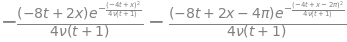

In [17]:
phiprime = phi.diff(x)
phiprime

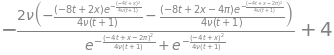

In [18]:
from sympy.utilities.lambdify import lambdify

u = -2*nu*(phiprime/phi)+4

u

In [19]:
u_lamb = lambdify((t, x, nu), u)
print("The value of u at t=1, x=4, nu=3 is {}.".format(u_lamb(1,4,3)))

The value of u at t=1, x=4, nu=3 is 3.49170664206445.


In [20]:
###variable declarations
nx = 201
T = 0.6
dx = 2*numpy.pi/(nx-1)
nu = .07
sigma = .1

dt = sigma*dx**2/nu 
nt = int(T/dt)

x = numpy.linspace(0, 2*numpy.pi, nx)
un = numpy.empty(nx)
t = 0
print(dt)
print(T/0.00145)
print(int(T/0.00145)) #truncate

0.0014099434858699084
413.7931034482759
413


In [21]:
u = numpy.asarray([u_lamb(t, x0, nu) for x0 in x])
u

array([4.        , 4.03141593, 4.06283185, 4.09424778, 4.12566371,
       4.15707963, 4.18849556, 4.21991149, 4.25132741, 4.28274334,
       4.31415927, 4.34557519, 4.37699112, 4.40840704, 4.43982297,
       4.4712389 , 4.50265482, 4.53407075, 4.56548668, 4.5969026 ,
       4.62831853, 4.65973446, 4.69115038, 4.72256631, 4.75398224,
       4.78539816, 4.81681409, 4.84823002, 4.87964594, 4.91106187,
       4.9424778 , 4.97389372, 5.00530965, 5.03672558, 5.0681415 ,
       5.09955743, 5.13097336, 5.16238928, 5.19380521, 5.22522113,
       5.25663706, 5.28805299, 5.31946891, 5.35088484, 5.38230077,
       5.41371669, 5.44513262, 5.47654855, 5.50796447, 5.5393804 ,
       5.57079633, 5.60221225, 5.63362818, 5.66504411, 5.69646003,
       5.72787596, 5.75929189, 5.79070781, 5.82212374, 5.85353967,
       5.88495559, 5.91637152, 5.94778745, 5.97920337, 6.0106193 ,
       6.04203522, 6.07345115, 6.10486708, 6.136283  , 6.16769893,
       6.19911486, 6.23053078, 6.26194671, 6.29336264, 6.32477

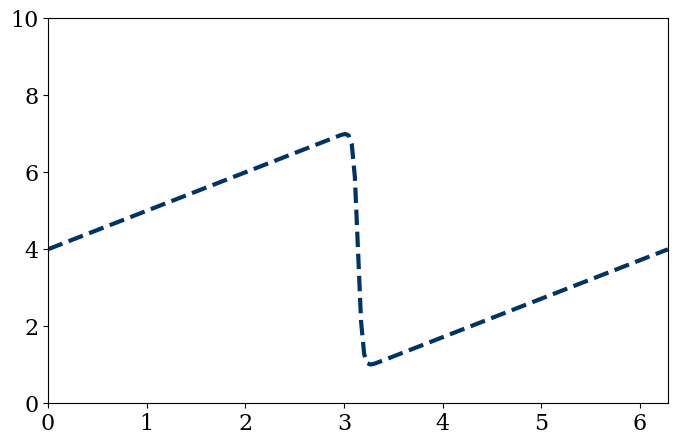

In [22]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x,u, color='#003366', ls='--', lw=3)
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10]);

In [23]:
# Numerical solution
for n in range(nt):
    un = u.copy()
    # Bulk
    u[1:-1] = un[1:-1] - un[1:-1] * dt/dx * (un[1:-1] - un[:-2])\
                + nu*dt/dx**2*(un[2:] - 2*un[1:-1] + un[:-2])

    # At the boundary
    u[0] = un[0] - un[0] * dt/dx * (un[0] - un[-1]) + nu*dt/dx**2*\
                (un[1] - 2*un[0] + un[-1])
    u[-1] = un[-1] - un[-1] * dt/dx * (un[-1] - un[-2]) + nu*dt/dx**2*\
                (un[0]- 2*un[-1] + un[-2])

In [24]:
# Analytical solution
u_analytical = numpy.asarray([u_lamb(nt*dt, xi, nu) for xi in x])
print("Total simulation time T = ", nt*dt)


Total simulation time T =  0.5992259814947111


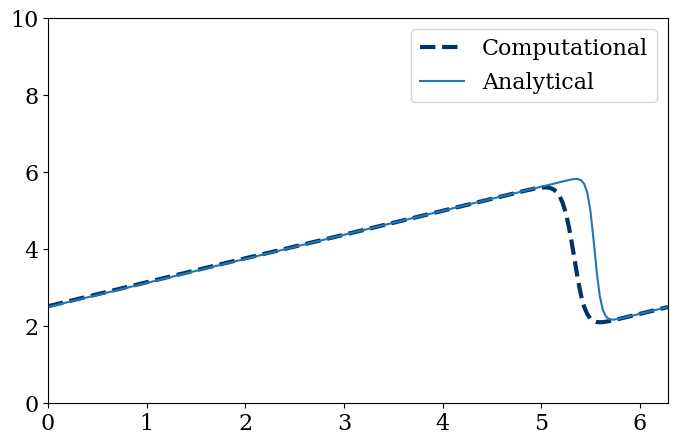

In [25]:
pyplot.figure(figsize=(8,5), dpi=100)
pyplot.plot(x, u, color='#003366', ls='--', lw=3, label='Computational')
pyplot.plot(x, u_analytical, label='Analytical')
pyplot.xlim([0,2*numpy.pi])
pyplot.ylim([0,10])
pyplot.legend();

In [26]:
print(u)

[2.51980996 2.53944624 2.55908253 2.57871883 2.59835513 2.61799144
 2.63762775 2.65726406 2.67690036 2.69653666 2.71617295 2.73580924
 2.75544551 2.77508177 2.794718   2.81435421 2.83399039 2.85362652
 2.87326259 2.89289859 2.91253449 2.93217027 2.9518059  2.97144134
 2.99107654 3.01071144 3.03034596 3.04998004 3.06961356 3.08924639
 3.10887841 3.12850944 3.14813928 3.1677677  3.18739444 3.2070192
 3.22664163 3.24626134 3.26587789 3.28549078 3.30509949 3.32470339
 3.34430185 3.36389413 3.38347948 3.40305707 3.42262603 3.44218544
 3.46173435 3.48127177 3.50079671 3.52030815 3.53980508 3.55928653
 3.57875154 3.59819922 3.61762874 3.63703936 3.65643045 3.67580151
 3.69515217 3.71448222 3.73379163 3.75308056 3.77234933 3.7915985
 3.8108288  3.83004119 3.84923682 3.86841703 3.88758333 3.90673741
 3.92588112 3.94501641 3.96414534 3.98327007 4.00239278 4.02151568
 4.04064099 4.05977088 4.07890744 4.09805271 4.11720858 4.13637682
 4.15555905 4.1747567  4.19397105 4.21320315 4.23245389 4.251723